<a href="https://colab.research.google.com/github/nofir19942/JAVA/blob/master/exer8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercercise we will try with MNIST dataset to reach 99.9% accuracy using the mnist dataset
neural network with 1 layer of 10 softmax neurons

· · · · · · · · · ·       (input data, flattened pixels)X [batch, 784]        # 784 = 28 * 28
 \x/x\x/x\x/x\x/x\x/    -- fully connected layer (softmax) and cross entropy 
   · · · · · · · · 
write a code for this layer and present the learning curves at each step!!

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
mnist = tf.keras.datasets.mnist

import matplotlib.pyplot as plt
import pydot
import numpy as np

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
#print(x_train.shape)

#adding this accelerate the running and the accuracy
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

##############
batch = 128
ep = 100
##########
#run on google colab 

In [ ]:
#https://www.tensorflow.org/guide/keras/sequential_model
#https://www.programcreek.com/python/example/110372/tensorflow.keras.Sequential

input_shape=(28, 28, 1)
softmax = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

#https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?hl=ko#compile
softmax.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
#https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?hl=ko#fit
s1 = softmax.fit(x_train, y_train, batch_size= 128, epochs= 100, validation_split=0.1)


Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.7234 - accuracy: 0.8203 - val_loss: 0.3517 - val_accuracy: 0.9158
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8987 - val_loss: 0.2850 - val_accuracy: 0.9255
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.9091 - val_loss: 0.2620 - val_accuracy: 0.9305
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.3105 - accuracy: 0.9141 - val_loss: 0.2498 - val_accuracy: 0.9332
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.9171 - val_loss: 0.2421 - val_accuracy: 0.9335
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.9199 - val_loss: 0.2372 - val_accuracy: 0.9348
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9216 - val_loss: 0.2333 - val_accuracy: 0.9377

Loss , accuracy: [0.28363290429115295, 0.9254000186920166]


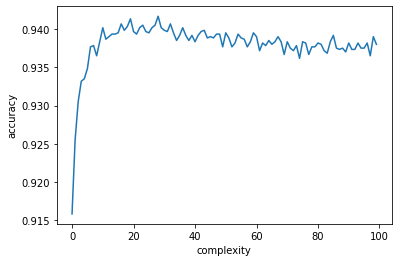

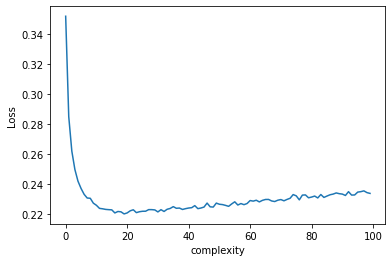

In [ ]:
print("Loss , accuracy:", softmax.evaluate(x_test, y_test, verbose=0))

import matplotlib.pyplot as plt
a_list = list(range(0, 100))  

plt.plot(a_list,s1.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s1.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()


Now go deep!
neural network with 5 layers with sigmoid function 

· · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
 \x/x\x/x\x/x\x/x\x/       -- fully connected layer (sigmoid)      W1 [784, 200]      B1[200]
  · · · · · · · · ·                                                Y1 [batch, 200]
   \x/x\x/x\x/x\x/         -- fully connected layer (sigmoid)      W2 [200, 100]      B2[100]
    · · · · · · ·                                                  Y2 [batch, 100]
     \x/x\x/x\x/           -- fully connected layer (sigmoid)      W3 [100, 60]       B3[60]
      · · · · ·                                                    Y3 [batch, 60]
       \x/x\x/             -- fully connected layer (sigmoid)      W4 [60, 30]        B4[30]
       · · ·                                                      Y4 [batch, 30]
        \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
         ·                                                        Y5 [batch, 10]

In [ ]:
sigmoid1 = tf.keras.Sequential(
    [
        tf.keras.Input(shape= input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation="sigmoid"), 
        tf.keras.layers.Dense(100, activation="sigmoid"), 
        tf.keras.layers.Dense(60, activation="sigmoid"), 
        tf.keras.layers.Dense(30, activation="sigmoid"), 
        tf.keras.layers.Dense(num_classes, activation="softmax"), 
    ]
)


#print(x_train.shape)

sigmoid1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
s2 = sigmoid1.fit(x_train, y_train, batch_size= 128, epochs= 100, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 1.3275 - accuracy: 0.6476 - val_loss: 0.4963 - val_accuracy: 0.9088
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.9139 - val_loss: 0.2499 - val_accuracy: 0.9433
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9411 - val_loss: 0.1814 - val_accuracy: 0.9562
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9554 - val_loss: 0.1447 - val_accuracy: 0.9630
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1392 - accuracy: 0.9642 - val_loss: 0.1215 - val_accuracy: 0.9688
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9713 - val_loss: 0.1093 - val_accuracy: 0.9700
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9766 - val_loss: 0.1017 - val_accuracy: 0.9733

Loss , accuracy: [0.19499146938323975, 0.9778000116348267]


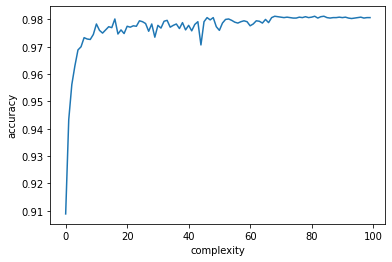

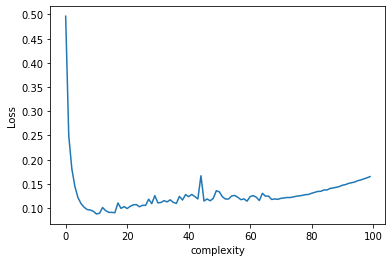

In [ ]:
print("Loss , accuracy:", sigmoid1.evaluate(x_test, y_test, verbose=0))

plt.plot(a_list,s2.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s2.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()

to improve lets add lr decay and change to relu

In [ ]:
relu = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation="relu"), 
        tf.keras.layers.Dense(100, activation="relu"), 
        tf.keras.layers.Dense(60, activation="relu"), 
        tf.keras.layers.Dense(30, activation="relu"), 
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96)

relu.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),metrics=["accuracy"])
s3 = relu.fit(x_train, y_train, batch_size= batch, epochs= ep, validation_split=0.1)


Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.5462 - accuracy: 0.8348 - val_loss: 0.1701 - val_accuracy: 0.9527
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1865 - accuracy: 0.9441 - val_loss: 0.1230 - val_accuracy: 0.9660
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9603 - val_loss: 0.0892 - val_accuracy: 0.9728
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0989 - accuracy: 0.9701 - val_loss: 0.1102 - val_accuracy: 0.9675
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0838 - val_accuracy: 0.9745
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0764 - val_accuracy: 0.9790

Loss , accuracy: [0.11520300060510635, 0.9800000190734863]


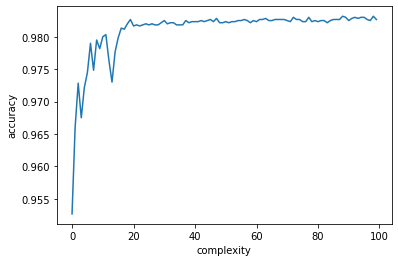

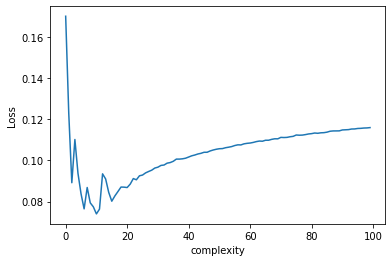

In [ ]:
print("Loss , accuracy:", relu.evaluate(x_test, y_test, verbose=0))

plt.plot(a_list,s3.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s3.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()

lets try and improve add either a drop out layer or a batch normalization layer!


In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
dropout = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation="relu"), 
        tf.keras.layers.Dense(100, activation="relu"), 
        tf.keras.layers.Dense(60, activation="relu"), 
        tf.keras.layers.Dense(30, activation="relu"), 
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

dropout.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),metrics=["accuracy"])
s4 = dropout.fit(x_train, y_train, batch_size= batch, epochs= ep, validation_split=0.1)

#https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
#Dropout Rate
#The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer.
#A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8.

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.4286 - val_loss: 0.4274 - val_accuracy: 0.8985
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 1.0694 - accuracy: 0.5674 - val_loss: 0.2497 - val_accuracy: 0.9463
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.9450 - accuracy: 0.6166 - val_loss: 0.2093 - val_accuracy: 0.9532
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.8774 - accuracy: 0.6462 - val_loss: 0.1726 - val_accuracy: 0.9632
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.8453 - accuracy: 0.6569 - val_loss: 0.1653 - val_accuracy: 0.9672
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.8121 - accuracy: 0.6749 - val_loss: 0.1486 - val_accuracy: 0.9682
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7949 - accuracy: 0.6865 - val_loss: 0.1555 - val_accuracy: 0.9692

Loss , accuracy: [0.2632165253162384, 0.9758999943733215]


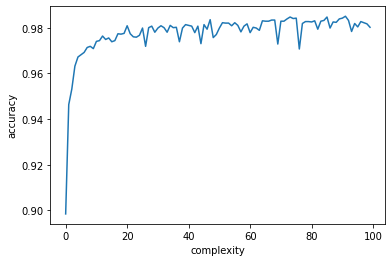

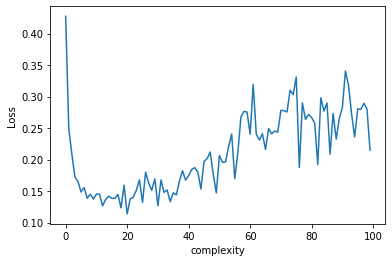

In [ ]:
print("Loss , accuracy:", dropout.evaluate(x_test, y_test, verbose=0))

plt.plot(a_list,s4.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s4.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()


In [ ]:
Lets move to a convolutional network (change the Dense fully-connected layer to a conv layer)

# neural network structure for this sample:
#
# · · · · · · · · · ·      (input data, 1-deep)                 X [batch, 28, 28, 1]
# @ @ @ @ @ @ @ @ @ @   -- conv. layer 5x5x1=>4 stride 1        W1 [5, 5, 1, 4]        B1 [4]
# ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                           Y1 [batch, 28, 28, 4]
#   @ @ @ @ @ @ @ @     -- conv. layer 5x5x4=>8 stride 2        W2 [5, 5, 4, 8]        B2 [8]
#   ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                             Y2 [batch, 14, 14, 8]
#     @ @ @ @ @ @       -- conv. layer 4x4x8=>12 stride 2       W3 [4, 4, 8, 12]       B3 [12]
#     ∶∶∶∶∶∶∶∶∶∶∶                                               Y3 [batch, 7, 7, 12] => reshaped to YY [batch, 7*7*12]
#      \x/x\x\x/        -- fully connected layer (relu)         W4 [7*7*12, 200]       B4 [200]
#       · · · ·                                                 Y4 [batch, 200]
#       \x/x\x/         -- fully connected layer (softmax)      W5 [200, 10]           B5 [10]
#        · · ·                                                  Y [batch, 10]
Dont forget to reshape at the end!
plot the learning curve

In [ ]:
#https://www.tensorflow.org/tutorials/images/cnn

conv = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(4, kernel_size=(5, 5), strides = 1,padding = 'same',    activation="relu"),
        tf.keras.layers.Conv2D(8, kernel_size=(5, 5), strides = 2,padding = 'same',   activation="relu"),
        tf.keras.layers.Conv2D(12, kernel_size=(4, 4), strides = 2,padding = 'same',  activation="relu"),        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(7*7*12, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

conv.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),metrics=["accuracy"])
#for some reason sometime its not runing if i use the const i defined above (batch = 128 ep = 100)
s5 = conv.fit(x_train, y_train, batch_size= 128, epochs= 100, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 3s 5ms/step - loss: 0.4239 - accuracy: 0.8658 - val_loss: 0.1173 - val_accuracy: 0.9643
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0962 - accuracy: 0.9703 - val_loss: 0.0733 - val_accuracy: 0.9787
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0600 - val_accuracy: 0.9832
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0687 - val_accuracy: 0.9813
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0591 - val_accuracy: 0.9838
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0657 - val_accuracy: 0.9832

Loss , accuracy: [0.08666201680898666, 0.9872000217437744]


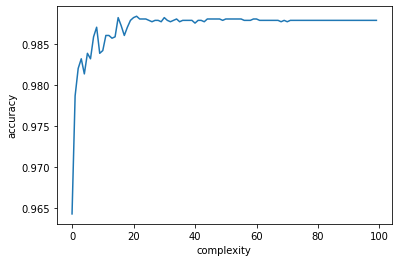

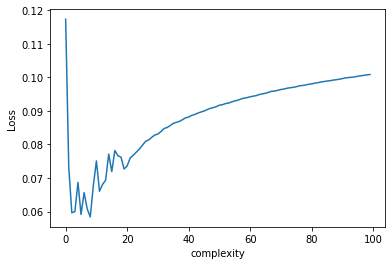

In [ ]:
print("Loss , accuracy:", conv.evaluate(x_test, y_test, verbose=0))

plt.plot(a_list,s5.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s5.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()

In [ ]:
Now to our final Goal 
first stride =1 add BN and relu conv net
next stride 2 output is 14x14 with relu and dropouts
next stride 2  output is 7x7 with BN
reshape
and then fully connected layer (relu+dropout+BN) to 200 
finally fully connected layer (softmax) to the 10 classes
plot the learning curve -  this should give 99% accuracy
# neural network structure for this sample:
#
# · · · · · · · · · ·      (input data, 1-deep)                    X [batch, 28, 28, 1]
# @ @ @ @ @ @ @ @ @ @   -- conv. layer +BN 6x6x1=>24 stride 1      W1 [5, 5, 1, 24]        B1 [24]
# ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                              Y1 [batch, 28, 28, 6]
#   @ @ @ @ @ @ @ @     -- conv. layer +BN 5x5x6=>48 stride 2      W2 [5, 5, 6, 48]        B2 [48]
#   ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                                Y2 [batch, 14, 14, 12]
#     @ @ @ @ @ @       -- conv. layer +BN 4x4x12=>64 stride 2     W3 [4, 4, 12, 64]       B3 [64]
#     ∶∶∶∶∶∶∶∶∶∶∶                                                  Y3 [batch, 7, 7, 24] => reshaped to YY [batch, 7*7*24]
#      \x/x\x\x/       -- fully connected layer (relu+dropout+BN) W4 [7*7*24, 200]       B4 [200]
#       · · · ·                                                    Y4 [batch, 200]
#       \x/x\x/         -- fully connected layer (softmax)         W5 [200, 10]           B5 [10]
#        · · ·                                                     Y [batch, 10]
Good Luck!

In [ ]:
finalGoal = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(24, kernel_size=(6, 6), strides = 1, padding = 'same',    activation="relu"),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Conv2D(48, kernel_size=(5, 5), strides = 2, padding = 'same',    activation="relu"),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Conv2D(64, kernel_size=(4, 4), strides = 2, padding = 'same',   activation="relu"),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(7*7*12, activation="relu"),
        #tf.keras.layers.Dense(200, activation="relu"),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

finalGoal.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),metrics=["accuracy"])
s6 = finalGoal.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 5s 10ms/step - loss: 0.2812 - accuracy: 0.9151 - val_loss: 0.0606 - val_accuracy: 0.9830
Epoch 2/100
422/422 [==============================] - 4s 10ms/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.0440 - val_accuracy: 0.9873
Epoch 3/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0830 - accuracy: 0.9751 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 4/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 5/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0581 - accuracy: 0.9833 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 6/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0481 - accuracy: 0.9858 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 7/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0455 - accuracy: 0.9863 - val_loss: 0.0314 - val_accuracy:

Loss , accuracy: [0.019241074100136757, 0.9951000213623047]


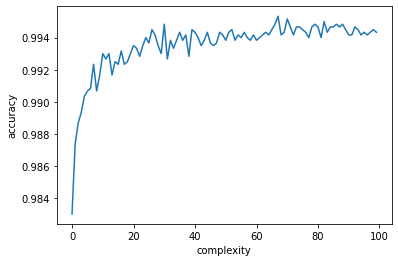

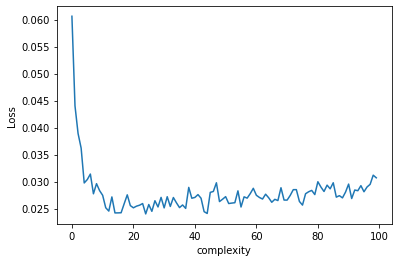

In [ ]:
print("Loss , accuracy:", finalGoal.evaluate(x_test, y_test, verbose=0))

plt.plot(a_list,s6.history['val_accuracy'])
plt.xlabel('complexity')
plt.ylabel('accuracy')
plt.show()

plt.plot(a_list,s6.history['val_loss'])
plt.xlabel('complexity')
plt.ylabel('Loss')
plt.show()